In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
def draw_data(x_c1,x_c2):
    plt.plot([c1[1] for c1 in x_c1],[c1[2] for c1 in x_c1],'+b')
    plt.plot([c2[1] for c2 in x_c2],[c2[2] for c2 in x_c2],'or')

def draw_line(w,col):
    x = [round(i*0.1,2) for i in range(-50,101)]
    y = [-w[0]/w[2]-w[1]/w[2]*val for val in x]
    plt.plot(x,y,col)

def draw_data_hyper_plane(x_c1,x_c2,w,col):
    draw_data(x_c1,x_c2)
    draw_line(w,col)

---- Perceptron_mis_yx() started -----
err = 14
err = 25
err = 12
err = 11
err = 10
err = 9
err = 3
err = 2
err = 1
err = 0


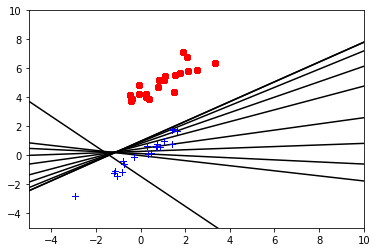

In [3]:
def perceptron_mis_yx(y,x,w,n_epoch,eta):
    n_sample = len(y)//2
    x_c1 = x[:n_sample]
    x_c2 = x[n_sample:n_sample*2]
    yx = [[y[i]*x[i][j] for j in range(3)] for i in range(len(x))]

    print("---- Perceptron_mis_yx() started -----")
    for e in range(1,n_epoch+1):
        rw = [w for _ in range(n_sample*2)]
        wyx = [sum([rw[i][j]*yx[i][j] for j in range(3)]) for i in range(len(yx))]
        yx_misclassified = [yx[i] for i in range(len(yx)) if wyx[i] < 0]
        
        for val in yx_misclassified:
            w[0] += val[0]
            w[1] += val[1]
            w[2] += val[2]

        err = len([val for val in wyx if val < 0])
        print(f'err = {err}')
        draw_data_hyper_plane(x_c1,x_c2,w,'k')

        if err == 0:
            return e
    return n_epoch

def start_perceptron_mis_yx():
    x_c1 = open('x_c1.txt','r')
    x_c2 = open('x_c2.txt','r')
    n_sample = 20
    x_c1_data = []
    x_c2_data = []
    plt.figure(1)
    plt.xlim([-5,10])
    plt.ylim([-5,10])

    for line in x_c1.readlines():
        a,b = map(float,line.split(','))
        x_c1_data.append([1.0,a,b])

    for line in x_c2.readlines():
        a,b = map(float,line.split(','))
        x_c2_data.append([1.0,a,b])

    x_c1.close()
    x_c2.close()

    y1 = [-1 for _ in range(n_sample)]
    y2 = [1 for _ in range(n_sample)]

    x = x_c1_data + x_c2_data
    y = y1 + y2
    w = [random.random() for _ in range(3)]

    n_epoch = 100
    eta = 0.001
    ret1 = perceptron_mis_yx(y, x, w, n_epoch, eta)

start_perceptron_mis_yx()

---- Perceptron_l2() started -----
err(1) = 349.644085 -24.332797
err(2) = 71.694445 -14.449797
err(3) = 30.247336 -10.438076
err(4) = 23.457315 -8.677273
err(5) = 21.770150 -7.782007
err(6) = 20.857486 -7.222092
err(7) = 20.084439 -6.794576
err(8) = 19.356956 -6.421723
err(9) = 18.660217 -6.086400
err(10) = 17.991050 -5.764406
err(11) = 17.348034 -5.451160
err(12) = 16.730048 -5.144879
err(13) = 16.136053 -4.844808
err(14) = 15.565065 -4.550589
err(15) = 15.016142 -4.262016
err(16) = 14.488383 -3.978942
err(17) = 13.980928 -3.701245
err(18) = 13.492954 -3.428814
err(19) = 13.023674 -3.161543
err(20) = 12.572334 -2.899329
err(21) = 12.138215 -2.648066
err(22) = 11.720628 -2.413979
err(23) = 11.318911 -2.184345
err(24) = 10.932433 -1.973224
err(25) = 10.560590 -1.770876
err(26) = 10.202801 -1.583777
err(27) = 9.858513 -1.402373
err(28) = 9.527194 -1.224464
err(29) = 9.208334 -1.062255
err(30) = 8.901445 -0.938535
err(31) = 8.606060 -0.831971
err(32) = 8.321730 -0.734617
err(33) = 8.0480

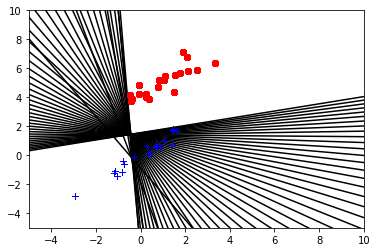

In [4]:
def perceptron_l2(y,x,w,n_epoch,eta):
    n_sample = len(y)//2
    x_c1 = x[:n_sample]
    x_c2 = x[n_sample:n_sample*2]
    print("---- Perceptron_l2() started -----")
    for e in range(1,n_epoch+1):
        rw = [w for _ in range(n_sample*2)] # 40 x 3
        wx = [sum([w[j]*x[i][j] for j in range(3)]) for i in range(len(x))]
        diff = [[(y[i]-wx[i])*x[i][j] for j in range(3)] for i in range(len(y))]
        diff_sum = [0,0,0]

        for val in diff:
            diff_sum[0] += val[0]
            diff_sum[1] += val[1]
            diff_sum[2] += val[2]

        w = [w[i] + eta*diff_sum[i] for i in range(3)]

        err1 = sum([(y[i]-wx[i])**2 for i in range(len(y))])*0.5
        err2 = sum([y[i]*wx[i] for i in range(len(y)) if y[i]*wx[i] < 0])
        print(f'err({e}) = {err1:f} {err2:f}')
        draw_data_hyper_plane(x_c1,x_c2,w,'k')

        if err2 == 0:
            return e
    return n_epoch

def start_perceptron_l2():
    x_c1 = open('x_c1.txt','r')
    x_c2 = open('x_c2.txt','r')
    n_sample = 20
    x_c1_data = []
    x_c2_data = []
    plt.figure(2)
    plt.xlim([-5,10])
    plt.ylim([-5,10])


    for line in x_c1.readlines():
        a,b = map(float,line.split(','))
        x_c1_data.append([1.0,a,b])

    for line in x_c2.readlines():
        a,b = map(float,line.split(','))
        x_c2_data.append([1.0,a,b])

    x_c1.close()
    x_c2.close()

    y1 = [-1 for _ in range(n_sample)]
    y2 = [1 for _ in range(n_sample)]

    x = x_c1_data + x_c2_data
    y = y1 + y2
    w = [random.random() for _ in range(3)]

    n_epoch = 100
    eta = 0.001
    
    ret1 = perceptron_l2(y, x, w, n_epoch, eta)

start_perceptron_l2()


>> svm2()
err(1) = 20.000000 -17.305953, w = 0.784925 0.138559 0.353803, |w|=0.872056, |w23|=0.379967
err(2) = 20.000000 -16.626987, w = 0.752612 0.134406 0.346413, |w|=0.839340, |w23|=0.371573
err(3) = 20.000000 -15.958802, w = 0.720813 0.130319 0.339140, |w|=0.807199, |w23|=0.363317
err(4) = 20.000000 -15.301228, w = 0.689519 0.126298 0.331983, |w|=0.775629, |w23|=0.355195
err(5) = 20.000000 -14.654095, w = 0.658721 0.122340 0.324940, |w|=0.744625, |w23|=0.347207
err(6) = 20.000000 -14.017238, w = 0.628412 0.118445 0.318008, |w|=0.714185, |w23|=0.339350
err(7) = 20.000000 -13.390494, w = 0.598585 0.114611 0.311186, |w|=0.684308, |w23|=0.331621
err(8) = 20.000000 -12.773701, w = 0.569231 0.110839 0.304473, |w|=0.654991, |w23|=0.324020
err(9) = 20.000000 -12.166703, w = 0.540344 0.107127 0.297867, |w|=0.626237, |w23|=0.316545
err(10) = 20.000000 -11.569343, w = 0.511915 0.103473 0.291365, |w|=0.598044, |w23|=0.309193
err(11) = 20.000000 -10.981469, w = 0.483938 0.099878 0.284966, |w|=0

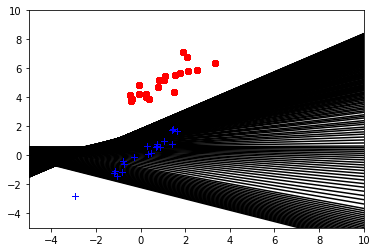

In [5]:
def svm(y,x,w,n_epoch,eta):
    n_sample = len(y)//2
    lamda = 0.01
    x_c1 = x[:n_sample]
    x_c2 = x[n_sample:n_sample*2]
    yx = [[y[i]*x[i][j] for j in range(3)] for i in range(len(x))]
    
    print(">> svm2()")
    for e in range(1,n_epoch+1):
        rw = [w for _ in range(n_sample*2)] # 40 x 3
        wyx = [sum([rw[i][j]*yx[i][j] for j in range(3)]) for i in range(len(yx))]

        yx_misclassified = [yx[i] for i in range(len(yx)) if wyx[i] < 1]

        n = -2*lamda*n_sample*2

        for val in yx_misclassified:
            for i in range(3):
                w[i] += eta * (n*w[i] + val[i])

        err1 = len([val for val in wyx if val < 1])
        err2 = sum([val for val in wyx if val < 1])
        print(f'err({e}) = {err1:f} {err2:f}, w = {w[0]:f} {w[1]:f} {w[2]:f}, |w|={sum([w[i]**2 for i in range(3)])**0.5:f}, |w23|={sum([w[i]**2 for i in range(1,3)])**0.5:f}')
        draw_data_hyper_plane(x_c1,x_c2,w,'k')

       

def start_svm():
    x_c1 = open('x_c1.txt','r')
    x_c2 = open('x_c2.txt','r')
    n_sample = 20
    x_c1_data = []
    x_c2_data = []
    plt.figure(2)
    plt.xlim([-5,10])
    plt.ylim([-5,10])


    for line in x_c1.readlines():
        a,b = map(float,line.split(','))
        x_c1_data.append([1.0,a,b])

    for line in x_c2.readlines():
        a,b = map(float,line.split(','))
        x_c2_data.append([1.0,a,b])

    x_c1.close()
    x_c2.close()

    y1 = [-1 for _ in range(n_sample)]
    y2 = [1 for _ in range(n_sample)]

    x = x_c1_data + x_c2_data
    y = y1 + y2
    w = [random.random() for _ in range(3)]

    n_epoch = 300
    eta = 0.001
    ret1 = svm(y, x, w, n_epoch, eta)

start_svm()
